Import necessary libraries, initialize a pandas dataframe with the fish_data, and observe the features and potential preprocessing paths

In [102]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import sklearn
import tensorflow 

In [103]:
data = pd.read_csv("fish_data.csv")

In [104]:
data

,id,average_length(inches)),average_weight(inches)),habitat,ph_of_water,color,Gender,life_span
0,1,14.69,5.87,ponds,6.2,Reddish_Orange,False,10.9
1,2,1.32,3.86,idlewater,6.8,Calico,True,5.2
2,3,14.23,12.09,lakes,7.9,Reddish_Orange,True,25.3
3,4,2.54,3.20,rivers,6.7,White,False,16.4
4,5,13.10,9.81,lakes,7.8,Orange,True,3.2
...,...,...,...,...,...,...,...,...
1995,1996,16.12,6.46,ponds,8.0,Red_and_White_Bi_Color,NaN,6.4
1996,1997,7.50,7.07,rivers,6.3,Black_and_Orange,True,14.0
1997,1998,10.52,3.27,slowmovingwaters,6.1,Orange,True,13.1
1998,1999,7.70,15.41,ponds,7.8,Orange,False,15.6


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2000 non-null   int64  
 1   average_length(inches))  2000 non-null   float64
 2   average_weight(inches))  2000 non-null   float64
 3   habitat                  2000 non-null   object 
 4   ph_of_water              2000 non-null   float64
 5   color                    2000 non-null   object 
 6   Gender                   1976 non-null   object 
 7   life_span                2000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 125.1+ KB


Notice the null values for the gender feature; I opted to just drop this data completely. We then create the training set and testing set. I use the convention of allocating 20% of our data to test set.

In [106]:
data = data.dropna()

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1976 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       1976 non-null   int64  
 1   average_length(inches))  1976 non-null   float64
 2   average_weight(inches))  1976 non-null   float64
 3   habitat                  1976 non-null   object 
 4   ph_of_water              1976 non-null   float64
 5   color                    1976 non-null   object 
 6   Gender                   1976 non-null   object 
 7   life_span                1976 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 138.9+ KB


In [108]:
data = data.rename(columns = {"average_weight(inches))" : "average_weight(ounces))"})
data = data.drop('id', axis = 1)

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1976 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   average_length(inches))  1976 non-null   float64
 1   average_weight(ounces))  1976 non-null   float64
 2   habitat                  1976 non-null   object 
 3   ph_of_water              1976 non-null   float64
 4   color                    1976 non-null   object 
 5   Gender                   1976 non-null   object 
 6   life_span                1976 non-null   float64
dtypes: float64(4), object(3)
memory usage: 123.5+ KB


Ignoring the object types, create a heatmap of our training set to see what features correlate with the lifespan. In this case, we can observe that there is low correlation for all the features. This  that there is not necessarily not a linear association with any one feature to the life_span. 

<Axes: >

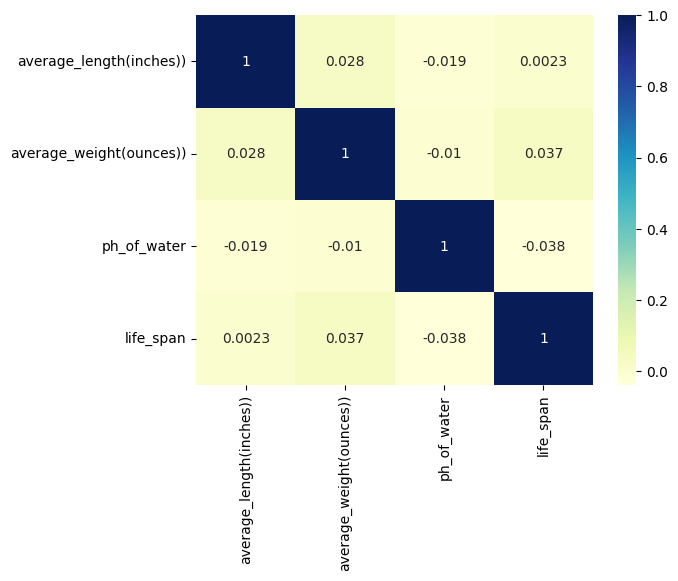

In [110]:
sns.heatmap(data[['average_length(inches))', 'average_weight(ounces))', "ph_of_water", "life_span"]].corr(), annot = True, cmap = "YlGnBu")

Observe the train_set histogram: we see a relatively equal distribution.
We could pursue an np.log function on our features, but it will actually cause more skewed data.

array([[<Axes: title={'center': 'average_length(inches))'}>,
        <Axes: title={'center': 'average_weight(ounces))'}>],
       [<Axes: title={'center': 'ph_of_water'}>,
        <Axes: title={'center': 'life_span'}>]], dtype=object)

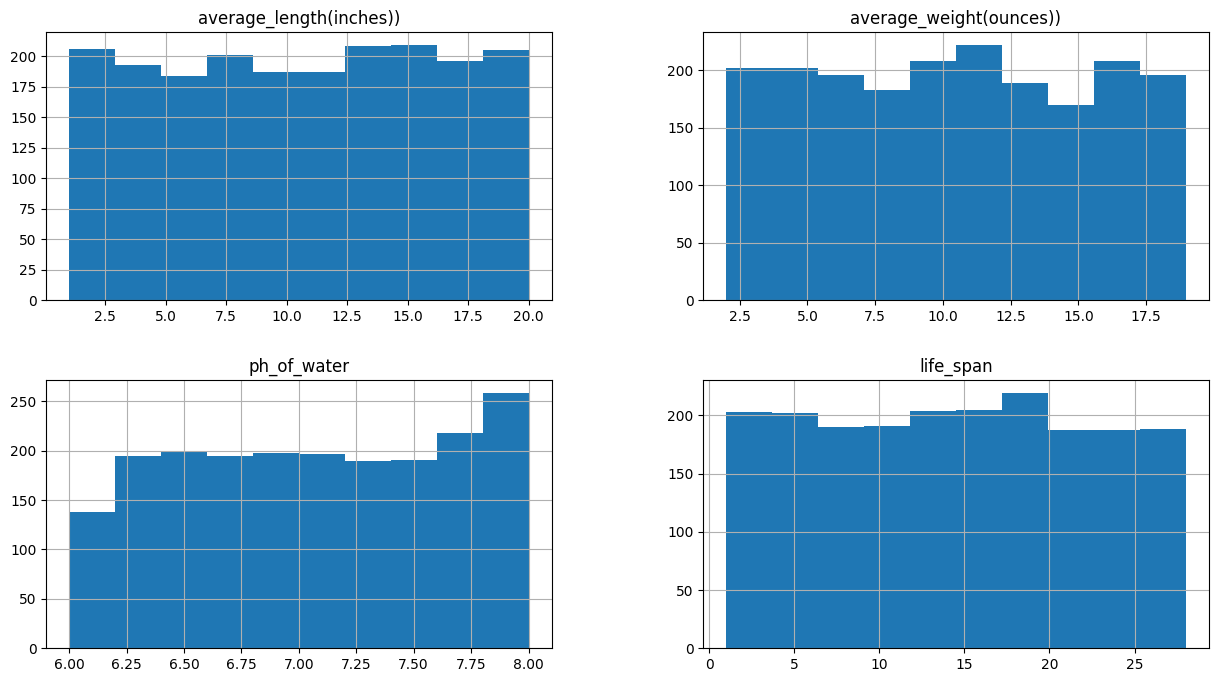

In [111]:
data[['average_length(inches))', 'average_weight(ounces))', "ph_of_water", "life_span"]].hist(figsize = (15,8))

Now we do one hot encoding to ensure that features of type object can also be viewed and linear associations can be understood. Notice we drop one feature from each iteration as the data contained in other features would account for the data dropped. After our one hot encoding, we can call a heatmap again to view the associations. 

In [112]:

data = data.join(pd.get_dummies(data.habitat, dtype = 'int')).drop(['habitat'], axis = 1)
data = data.join(pd.get_dummies(data.color, dtype = 'int')).drop(['color'], axis = 1)
data = data.join(pd.get_dummies(data.Gender, dtype = 'int')).drop(['Gender'], axis = 1)

data = data.rename(columns = {True : "Male"})
data = data.drop(False, axis = 1)
data = data.drop('lakes', axis =1)
data = data.drop('Yellow', axis =1)


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1976 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   average_length(inches))  1976 non-null   float64
 1   average_weight(ounces))  1976 non-null   float64
 2   ph_of_water              1976 non-null   float64
 3   life_span                1976 non-null   float64
 4   idlewater                1976 non-null   int32  
 5   ponds                    1976 non-null   int32  
 6   rivers                   1976 non-null   int32  
 7   slowmovingwaters         1976 non-null   int32  
 8   Black_and_Orange         1976 non-null   int32  
 9   Calico                   1976 non-null   int32  
 10  Green_and_Chocolate      1976 non-null   int32  
 11  Orange                   1976 non-null   int32  
 12  Red_and_Silver           1976 non-null   int32  
 13  Red_and_White_Bi_Color   1976 non-null   int32  
 14  Reddish_Orange           1976

<Axes: >

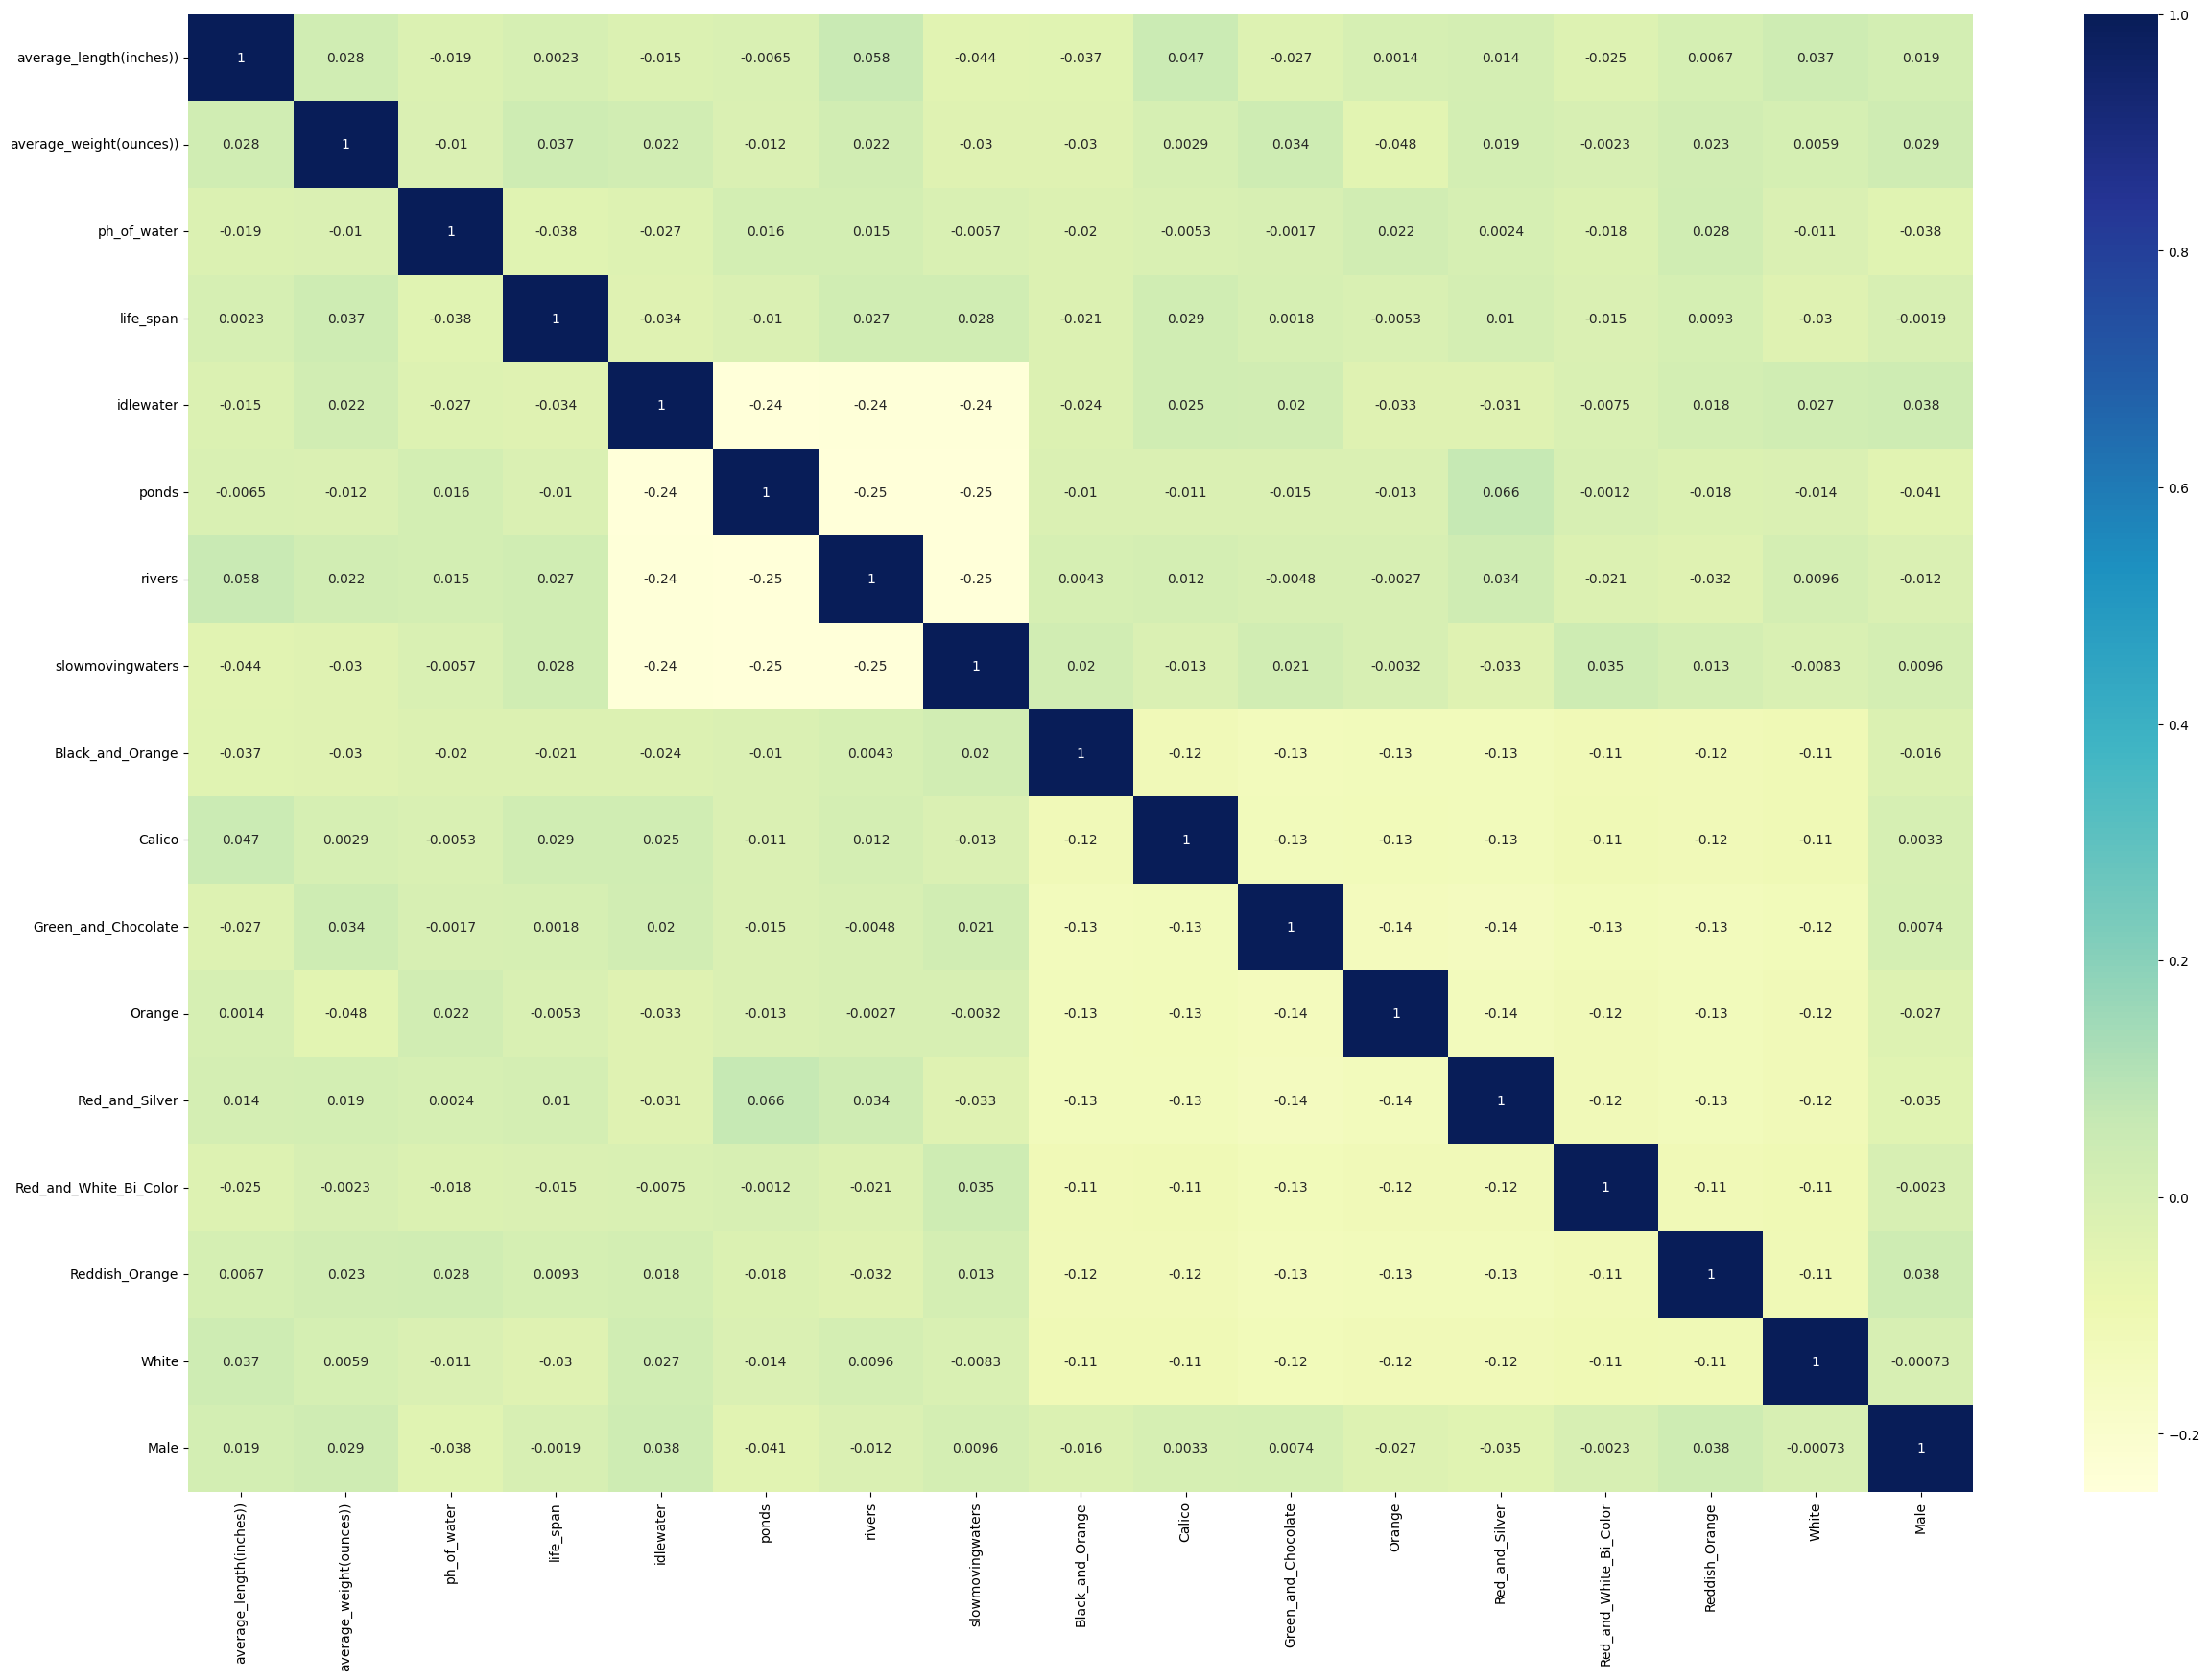

In [114]:
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu")

In [115]:
from sklearn.model_selection import train_test_split
X = data.drop(['life_span'], axis = 1)
y = data['life_span']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

Multicollinearity check function is created. Here we can notice that the only columns with even a hint of correlation with each other are columns that were under the same feature before one hot encoding. In essence, if your habitat is a river then there's obviously a chance that your habitat isn't going to be a lake or a pond. If your gender is male, then you have a negative correlation to being female. We won't be dropping these columns because it makes sense that they're correlated negatively.

In [116]:
X_train.corr()

,average_length(inches)),average_weight(ounces)),ph_of_water,idlewater,ponds,rivers,slowmovingwaters,Black_and_Orange,Calico,Green_and_Chocolate,Orange,Red_and_Silver,Red_and_White_Bi_Color,Reddish_Orange,White,Male
average_length(inches)),1.000000,0.012426,-0.019271,-0.010590,-0.020655,0.075841,-0.056217,-0.048846,0.048113,-0.010950,-0.011863,-0.009062,-0.031324,0.026700,0.032608,0.019533
average_weight(ounces)),0.012426,1.000000,-0.021621,0.017557,-0.012033,0.012400,-0.016597,-0.020515,-0.009211,0.029637,-0.067302,0.012570,-0.007905,0.042861,0.021115,0.039500
ph_of_water,-0.019271,-0.021621,1.000000,-0.040788,0.019699,0.024932,0.017126,-0.021490,-0.007300,-0.020324,0.026422,-0.011295,-0.010031,0.034317,0.001653,-0.038954
idlewater,-0.010590,0.017557,-0.040788,1.000000,-0.246482,-0.238243,-0.245032,-0.001238,0.024700,0.007834,-0.043995,-0.028388,-0.026133,0.016511,0.050686,0.045665
ponds,-0.020655,-0.012033,0.019699,-0.246482,1.000000,-0.245480,-0.252475,-0.029826,-0.014337,-0.006178,-0.036425,0.068336,-0.000955,-0.002151,-0.006344,-0.035207
rivers,0.075841,0.012400,0.024932,-0.238243,-0.245480,1.000000,-0.244036,0.010322,0.015563,-0.028852,0.003244,0.041028,-0.019660,-0.013891,0.007844,-0.018566
slowmovingwaters,-0.056217,-0.016597,0.017126,-0.245032,-0.252475,-0.244036,1.000000,0.033383,-0.017804,0.042299,-0.004595,-0.035114,0.038425,-0.010875,-0.015652,0.010449
Black_and_Orange,-0.048846,-0.020515,-0.021490,-0.001238,-0.029826,0.010322,0.033383,1.000000,-0.120157,-0.134228,-0.120940,-0.129374,-0.110933,-0.117395,-0.110933,-0.018729
Calico,0.048113,-0.009211,-0.007300,0.024700,-0.014337,0.015563,-0.017804,-0.120157,1.000000,-0.136464,-0.122955,-0.131529,-0.112781,-0.119351,-0.112781,0.008046
Green_and_Chocolate,-0.010950,0.029637,-0.020324,0.007834,-0.006178,-0.028852,0.042299,-0.134228,-0.136464,1.000000,-0.137352,-0.146931,-0.125988,-0.133327,-0.125988,0.002580


In [117]:
def correlation(df, threshold):
    correlated_columns = set()
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i,j])) > threshold:
                colname = corr_matrix.columns[i]
                correlated_columns.add(colname)
    return correlated_columns



In [118]:
correlation(X,0.2)

{'ponds', 'rivers', 'slowmovingwaters'}

I created some synthetic data and added this data to our dataframe. This yields slightly better results

In [119]:
synthetic = pd.read_csv('synthetic_fish.csv')
synthetic = synthetic.drop('Unnamed: 0', axis =1)
synthetic = synthetic.drop('lakes', axis = 1)
synthetic = synthetic.drop('Yellow', axis = 1)
synthetic = synthetic.drop('Female', axis = 1)
synthetic_X = synthetic.drop('life_span', axis =1)
synthetic_y = synthetic['life_span']

frames = [X_train, synthetic_X]
X_train = pd.concat(frames)
frames = [y_train, synthetic_y]
y_train = pd.concat(frames)

Now we will implement a linear regression model. We train the model on a scaled X_train, and then test the data using the scaled test_set X and y variables. Notice that the linear regression model and the random forest regressor model performs poorly. 
Initially, I believed that our model simply had nonlinear associations, but this wouldn't account for the random forest regressor performing poorly, as it thrives in nonlinear environments. After reviewing the models of others, it's clear to see that the current training of models isn't adequate. 

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
scaler = StandardScaler()
lin_reg = LinearRegression()

X_train_s = scaler.fit_transform(X_train)
lin_reg.fit(X_train_s, y_train)



LinearRegression()

In [121]:
X_test_s = scaler.transform(X_test)
score = lin_reg.score(X_test_s, y_test)

y_pred = lin_reg.predict(X_test_s)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Score:{score}")


Mean Absolute Error (MAE): 6.82
Mean Squared Error (MSE): 61.86
Root Mean Squared Error (RMSE): 7.87
Score:0.002642990788680799


Below we implemented l1 regularization with a lasso regression model


In [122]:
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
lasso_reg = linear_model.Lasso()

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

lasso_grid_search = GridSearchCV(lasso_reg, param_grid, cv = 10, scoring = 'neg_mean_squared_error')
lasso_grid_search.fit(X_train_s, y_train)

best_lasso = lasso_grid_search.best_estimator_
score = best_lasso.score(X_test_s, y_test)



In [123]:
y_pred = best_lasso.predict(X_test_s)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Score:{score}")

Mean Absolute Error (MAE): 6.82
Mean Squared Error (MSE): 61.86
Root Mean Squared Error (RMSE): 7.87
Score:0.0026624159780676004


Below we implemented l2 regularization with a Ridge model

In [124]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge_grid_search = GridSearchCV(ridge_reg, param_grid, cv = 10, scoring = 'neg_mean_squared_error')
ridge_grid_search.fit(X_train_s, y_train)

best_ridge = ridge_grid_search.best_estimator_
score = best_ridge.score(X_test_s, y_test)



In [125]:
y_pred = best_ridge.predict(X_test_s)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Score:{score}")


Mean Absolute Error (MAE): 6.82
Mean Squared Error (MSE): 61.85
Root Mean Squared Error (RMSE): 7.86
Score:0.002752428546361707


Below we implemented a RandomForestRegressor model

In [126]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor().fit(X_train_s, y_train)

score = forest_reg.score(X_test_s, y_test)
y_pred = forest_reg.predict(X_test_s)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Score:{score}")


Mean Absolute Error (MAE): 6.98
Mean Squared Error (MSE): 66.08
Root Mean Squared Error (RMSE): 8.13
Score:-0.06547890684562518


After experimenting with GridSearchCV, I found that the optimal n_estimators was 700. This achieves an MAE of ~6.78, but a R^2 score significantly lower than previous models

In [127]:
forest_reg = RandomForestRegressor()
param_grid = {
    "n_estimators" : [700],
    "max_depth" : [4],
}

forest_grid_search = GridSearchCV(forest_reg, param_grid)
forest_grid_search.fit(X_train_s, y_train)


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4], 'n_estimators': [700]})

In [128]:
best_forest = forest_grid_search.best_estimator_
score = best_forest.score(X_test_s, y_test)
y_pred = best_forest.predict(X_test_s)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Score:{score}")


Mean Absolute Error (MAE): 6.84
Mean Squared Error (MSE): 61.67
Root Mean Squared Error (RMSE): 7.85
Score:0.005729815305546726


In [129]:
forest_grid_search.best_estimator_

RandomForestRegressor(max_depth=4, n_estimators=700)

Notice below: length, weight, and pH contributed the most to the decision. 

In [130]:
feature_list = list(X.columns)
feature_imp = pd.Series(best_forest.feature_importances_, index = feature_list).sort_values(ascending = False)
print(feature_imp)

average_length(inches))    0.283391
average_weight(ounces))    0.262513
ph_of_water                0.203405
Male                       0.063171
White                      0.044179
Red_and_White_Bi_Color     0.029311
Green_and_Chocolate        0.020986
ponds                      0.016584
rivers                     0.015700
slowmovingwaters           0.011413
Reddish_Orange             0.009885
idlewater                  0.009262
Calico                     0.008611
Red_and_Silver             0.007784
Orange                     0.006944
Black_and_Orange           0.006863
dtype: float64


We will now implement a support vector regression model and choose the best model from linear, poly, rbf, and sigmoid kernels

In [131]:
from sklearn import svm
from sklearn import model_selection

vector_reg = svm.LinearSVR()

param_grid = {'C':[0.1, 1, 10], 'dual': [True], 'max_iter' : [2000]}
svm_grid_search = GridSearchCV(vector_reg, param_grid, cv = 10, scoring = 'neg_mean_squared_error', return_train_score = True)
svm_grid_search.fit(X_train_s, y_train)

best_svm = svm_grid_search.best_estimator_
y_pred = best_svm.predict(X_test_s)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Score:{score}")

Mean Absolute Error (MAE): 6.80
Mean Squared Error (MSE): 62.62
Root Mean Squared Error (RMSE): 7.91
Score:0.005729815305546726



linear_vector_reg = svm.LinearSVR()
linear_vector_reg.fit(X_train_s, y_train)

y_pred = linear_vector_reg.predict(X_test_s)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Score:{score}")


no_vector_reg = svm.NuSVR()
no_vector_reg.fit(X_train_s, y_train)

y_pred = no_vector_reg.predict(X_test_s)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Score:{score}")


We will now try ensembling our three best Regression models using VotingRegressor.

In [132]:
from sklearn.ensemble import VotingRegressor
er = VotingRegressor([('forr', best_forest), ('lasr', best_lasso), ('svrr', best_svm)],)
er.fit(X_train_s, y_train)

y_pred = er.predict(X_test_s)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Score:{score}")

Mean Absolute Error (MAE): 6.81
Mean Squared Error (MSE): 61.77
Root Mean Squared Error (RMSE): 7.86
Score:0.005729815305546726


In [133]:
param_grid = {'weights' : [(1,1,1), (1,2,1), (1,1,2), (2,1,1), (1, 2, 2), (2,2,1)],}
ensemble_grid_search = GridSearchCV(er, param_grid, cv = 10, scoring = 'neg_mean_squared_error', return_train_score = True)
ensemble_grid_search.fit(X_train_s, y_train)

best_en = ensemble_grid_search.best_estimator_

y_pred = best_en.predict(X_test_s)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Score:{score}")


Mean Absolute Error (MAE): 6.82
Mean Squared Error (MSE): 61.72
Root Mean Squared Error (RMSE): 7.86
Score:0.005729815305546726


In [134]:
ensemble_grid_search.best_estimator_

VotingRegressor(estimators=[('forr',
                             RandomForestRegressor(max_depth=4,
                                                   n_estimators=700)),
                            ('lasr', Lasso(alpha=0.001)),
                            ('svrr', LinearSVR(C=1, dual=True, max_iter=2000))],
                weights=(2, 2, 1))

We will now try a sequential neural network model. Notice that this model scores significantly lower than the hyper parameterized decision tree

In [135]:

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
model = Sequential()
model.add(Dense(45, input_dim = 16, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mae', 'R2Score'])
model.summary()

history = model.fit(X_train_s, y_train, validation_split = 0.2, epochs = 200)



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 45)                765       
                                                                 
 dense_7 (Dense)             (None, 4)                 184       
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 954 (3.73 KB)
Trainable params: 954 (3.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/200
165/165 [==============================] - 1s 2ms/step - loss: 265.8719 - mae: 14.1317 - r2_score: -3.0744 - val_loss: 236.1386 - val_mae: 13.0105 - val_r2_score: -2.4538
Epoch 2/200
165/165 [==============================] - 0s 1ms/step - loss: 142.0709 - mae: 9.7041 - r2_score: -1.1772 - val_loss: 94.8160 - val_mae: 8.2307 - val_r2_score: -0.3868
Epoch 3/200
165/165 [==============================] - 0s 1ms/step - loss: 70.8289 - mae: 7.2542 - r2_score: -0.0854 - val_loss: 71.7057 - val_mae: 7.4508 - val_r2_score: -0.0488
Epoch 4/200
165/165 [==============================] - 0s 1ms/step - loss: 66.0244 - mae: 7.0760 - r2_score: -0.0118 - val_loss: 70.7357 - val_mae: 7.4221 - val_r2_score: -0.0346
Epoch 5/200
165/165 [==============================] - 0s 1ms/step - loss: 65.5426 - mae: 7.0593 - r2_score: -0.0044 - val_loss: 70.5593 - val_mae: 7.4231 - val_r2_score: -0.0320
Epoch 6/200
165/165 [==============================] - 0s 1ms/step - loss: 65.2544 - mae: 7.0509 - r

In [136]:
mse_neural, mae_neural, score = model.evaluate(X_test_s, y_test)

13/13 [==============================] - 0s 1ms/step - loss: 66.2264 - mae: 6.9565 - r2_score: -0.0678
